# Kalman Filter
Use a Kalman filter to estimate a car's true position.
Given noisy position data, creates an estimate of the car's velocity and direction
assuming random acceleration.
Plots the true position vs observed position vs estimated position.

In [186]:
import numpy as np
from numpy import linalg as la
import scipy
from matplotlib import pyplot as plt

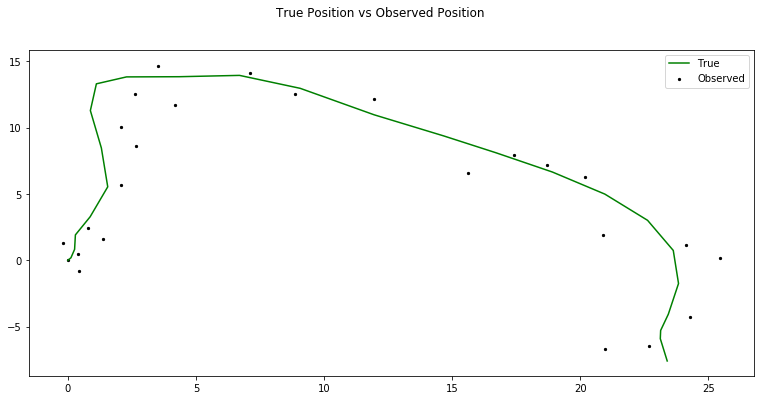

In [189]:
def get_noisy_data(n=10):
    """
    Generates an array of (x,y) positional data over time.
    Assumes random acceleration.
    At each timestep, we update x based on velocity and acceleration at previous timestep,
    then update velocity based on acceleration at previous timestep, then choose new acceleration.
    Returns:
        pos_true ((n,2) ndarray): true positional data.
        pos_obs ((n,2) ndarray): observed positional data, error proportional to velocity.
    """
    x_true = np.zeros((n,2))
    x_obs = np.zeros((n,2))
    vel = np.zeros((n,2))
    acc = np.random.randn(2)
    
    for i in range(1,n):
        x_true[i,:] = x_true[i-1,:] + vel[i-1,:] + 0.5*acc
        vel[i,:] = vel[i-1,:] + acc
        acc = np.random.randn(2)
        x_obs[i,:] = x_true[i-1,:] + np.random.randn(2)
    
    return x_true, x_obs

def plot_pos(true=None, obs=None, est=None, title=None):
    """
    Plots a sequence of (x,y) positional data over time.
    Parameters:
        pos ((n,2) ndarray): positional data.
    """
    fig, ax = plt.subplots(1, 1, figsize=(13,6))
    if true is not None:
        ax.plot(true[:,0], true[:,1], label="True", color='green')
    if est is not None:
        ax.plot(est[:,0], est[:,1], label="Estimate", color='red')
    if obs is not None:
        ax.scatter(obs[:,0], obs[:,1], label="Observed", color='black', s=5)
    ax.legend(loc='upper right')
    if title:
        fig.suptitle(title)
    plt.show()
    
n = 25
x_true, x_obs = get_noisy_data(n=n)
plot_pos(true=x_true, obs=x_obs, title="True Position vs Observed Position")

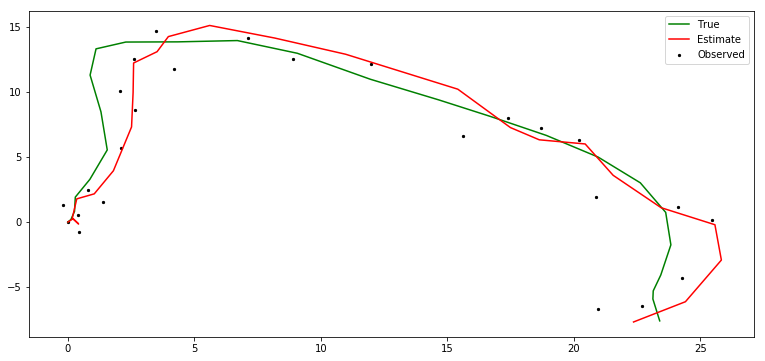

In [190]:
def state_model(x_obs, gain=[0.5, 0.5]):
    """
    Maintains estimates of true position and true velocity, given observed position.
    Assumes random acceleration.
    We use the model combining state transition model and new knowledge.
    x_est = beta*(x_est_prev + v_est_prev) + (1-beta)*(x_obs)
    v_est = beta*(v_est_prev) + (1-beta)*(v_obs)
    v_obs = x_obs - x_obs_prev
    Parameters:
        x_obs ((n,2) ndarray): the observed coordinates over time.
    Returns:
        x_est ((n,2) ndarray): the estimated coordinates over time.
    """
    n = x_obs.shape[0]
    state = np.zeros((n,2))
    x_est = np.zeros((n,2))
    v_est = np.zeros((n,2))
    
    for i in range(1,n):
        # if our velocity is high, trust our state velocity more than the observed velocity.
        v_est[i] = (1-gain[1])*(v_est[i-1,:]) + gain[1]*(x_obs[i]-x_obs[i-1])
        # expected state plus gain*observational difference
        x_est[i] = (1-gain[0])*(x_est[i-1]+v_est[i-1]) + gain[0]*(x_obs[i])
        
    return x_est

x_est = state_model(x_obs, gain=[0.5, 0.5])
plot_pos(true=x_true, obs=x_obs, est=x_est)